In [1]:
import pandas as pd

In [6]:
import mlflow
mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("nyc-taxi-experiment")

2025/12/05 15:31:44 INFO mlflow.tracking.fluent: Experiment with name 'nyc-taxi-experiment' does not exist. Creating a new experiment.


<Experiment: artifact_location='/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/mlruns/2', creation_time=1764945104161, experiment_id='2', last_update_time=1764945104161, lifecycle_stage='active', name='nyc-taxi-experiment', tags={}>

In [83]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')

In [84]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [85]:
df_val = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')
df_val.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.4,3.50,0.5,0.0,0.0,1.0,9.40,2.5,0.00
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,-3.0,-1.00,-0.5,0.0,0.0,-1.0,-5.50,0.0,0.00
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,3.0,1.00,0.5,0.0,0.0,1.0,5.50,0.0,0.00
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.9,2.25,0.5,0.0,0.0,1.0,74.65,0.0,1.25
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.0,1.00,0.5,3.3,0.0,1.0,25.30,2.5,0.00


In [90]:
def create_duration_col(df):
    # Add a duration feature by computing it from pick p and drop off time

    lpep_dropoff_datetime=pd.to_datetime(df.tpep_dropoff_datetime)
    lpep_pickup_datetime=pd.to_datetime(df.tpep_pickup_datetime)
    
    df['duration']=lpep_dropoff_datetime-lpep_pickup_datetime
    df.duration=df.duration.apply(lambda td: td.total_seconds()/60)
    df=df[df.duration>0]
    
    # Keep only durations included between 1 and 60 minutes
    df = df[ (df.duration >1) & (df.duration<60) ]
    
    return df

In [87]:
df = create_duration_col(df)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333


In [88]:
df_val = create_duration_col(df_val)
df_val.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.4,3.50,0.5,0.00,0.0,1.0,9.40,2.5,0.00,1.683333
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.9,2.25,0.5,0.00,0.0,1.0,74.65,0.0,1.25,32.083333
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.0,1.00,0.5,3.30,0.0,1.0,25.30,2.5,0.00,13.300000
5,1,2023-02-01 00:52:40,2023-02-01 01:07:18,1.0,5.10,1.0,N,148,236,1,21.9,3.50,0.5,5.35,0.0,1.0,32.25,2.5,0.00,14.633333
6,1,2023-02-01 00:12:39,2023-02-01 00:40:36,1.0,8.90,1.0,N,137,244,1,41.5,3.50,0.5,3.50,0.0,1.0,50.00,2.5,0.00,27.950000


In [89]:
df.duration.describe(percentiles=[0.95, 0.98, 0.99])

count    3.008849e+06
mean     1.420544e+01
std      9.937594e+00
min      1.016667e+00
50%      1.155000e+01
95%      3.476667e+01
98%      4.450000e+01
99%      5.026667e+01
max      5.998333e+01
Name: duration, dtype: float64

In [91]:
categorical=['PULocationID', 'DOLocationID']
numerical=['trip_distance']

In [92]:
# Convet categories into strings (they are integers in the sorce data frame) in order to use a Dictionary Vectorizer (see next cells)

In [93]:
df[categorical] = df[categorical].astype(str)

In [94]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object

In [95]:
from sklearn.feature_extraction import DictVectorizer

In [96]:
df[categorical + numerical].iloc[:10]

,PULocationID,DOLocationID,trip_distance
0,161,141,0.97
1,43,237,1.10
2,48,238,2.51
3,138,7,1.90
4,107,79,1.43
5,161,137,1.84
6,239,143,1.66
7,142,200,11.70
8,164,236,2.95
9,141,107,3.01


In [97]:
# Create a training dictionary by converting rows related to categorical + numerical columns into dictionaries

In [98]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

In [99]:
train_dicts[:10]

[{'PULocationID': '161', 'DOLocationID': '141', 'trip_distance': 0.97},
 {'PULocationID': '43', 'DOLocationID': '237', 'trip_distance': 1.1},
 {'PULocationID': '48', 'DOLocationID': '238', 'trip_distance': 2.51},
 {'PULocationID': '138', 'DOLocationID': '7', 'trip_distance': 1.9},
 {'PULocationID': '107', 'DOLocationID': '79', 'trip_distance': 1.43},
 {'PULocationID': '161', 'DOLocationID': '137', 'trip_distance': 1.84},
 {'PULocationID': '239', 'DOLocationID': '143', 'trip_distance': 1.66},
 {'PULocationID': '142', 'DOLocationID': '200', 'trip_distance': 11.7},
 {'PULocationID': '164', 'DOLocationID': '236', 'trip_distance': 2.95},
 {'PULocationID': '141', 'DOLocationID': '107', 'trip_distance': 3.01}]

In [100]:
# Use the DictVectorizer() to create one feature for each PULocationID and DOLocationID values

In [101]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [102]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [103]:
dv.feature_names_[-10:]

['PULocationID=90',
 'PULocationID=91',
 'PULocationID=92',
 'PULocationID=93',
 'PULocationID=94',
 'PULocationID=95',
 'PULocationID=96',
 'PULocationID=97',
 'PULocationID=98',
 'trip_distance']

In [104]:
df_val.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.4,3.50,0.5,0.00,0.0,1.0,9.40,2.5,0.00,1.683333
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.9,2.25,0.5,0.00,0.0,1.0,74.65,0.0,1.25,32.083333
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.0,1.00,0.5,3.30,0.0,1.0,25.30,2.5,0.00,13.300000
5,1,2023-02-01 00:52:40,2023-02-01 01:07:18,1.0,5.10,1.0,N,148,236,1,21.9,3.50,0.5,5.35,0.0,1.0,32.25,2.5,0.00,14.633333
6,1,2023-02-01 00:12:39,2023-02-01 00:40:36,1.0,8.90,1.0,N,137,244,1,41.5,3.50,0.5,3.50,0.0,1.0,50.00,2.5,0.00,27.950000


In [105]:
target = 'duration'
y_train = df[target].values
y_val = df_val[target].values

In [106]:
y_train.size

3008849

In [107]:
y_train[:10]

array([ 8.43333333,  6.31666667, 12.75      ,  9.61666667, 10.83333333,
       12.3       , 10.45      , 22.73333333, 14.93333333, 10.9       ])

In [108]:
# Train a linear regression model

In [109]:
X_train.toarray()

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.97],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.1 ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 2.51],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 4.67],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 3.15],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 2.85]], shape=(3008849, 516))

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
# visualize predictions on the same training data

In [41]:
y_pred = lr.predict(X_train)

In [42]:
y_pred

array([11.47342664, 10.93389163, 11.37595493, ..., 11.67295836,
       12.70943978, 11.61136069], shape=(3008849,))

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_84117/1505421196.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_84117/1505421196.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


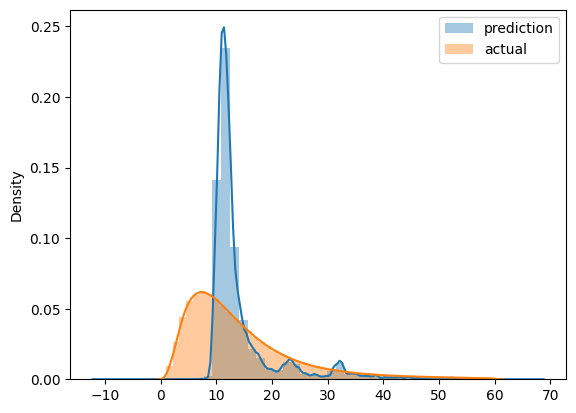

In [44]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')
plt.legend()

In [118]:
# Estimate the model score
from sklearn.metrics import root_mean_squared_error # standard deviation = sqrt(mean_squared_error)
root_mean_squared_error(y_train, y_pred)

7.656644348714253

In [46]:
# error is very high, try to use another model
from sklearn.linear_model import Lasso

In [55]:
with mlflow.start_run():

    alpha=0.01
    
    mlflow.set_tag("developer","Beppe")
    mlflow.log_param("train-data-url","https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet")
    mlflow.log_param("alpha",alpha)

    lr_lasso = Lasso(alpha)
    lr_lasso.fit(X_train, y_train)
    y_pred_lasso = lr.predict(X_train)

    rmse = mean_squared_error(y_train, y_pred_lasso)

    mlflow.log_param("rmse",rmse)
    

In [54]:
import pickle
with open('models/lin_reg.bin','wb') as f_out:
    pickle.dump((dv,lr), f_out)

In [48]:
df_train = df[categorical + numerical]

In [49]:
df_train[:10]

,PULocationID,DOLocationID,trip_distance
0,161,141,0.97
1,43,237,1.10
2,48,238,2.51
3,138,7,1.90
4,107,79,1.43
5,161,137,1.84
6,239,143,1.66
7,142,200,11.70
8,164,236,2.95
9,141,107,3.01


In [50]:
df_train[ ( (df_train.PULocationID=='161') & ( df_train.DOLocationID=='141') ) ]

,PULocationID,DOLocationID,trip_distance
0,161,141,0.97
604,161,141,2.00
1434,161,141,1.83
2240,161,141,1.41
2260,161,141,1.80
...,...,...,...
3064303,161,141,1.36
3065972,161,141,1.96
3066315,161,141,1.10
3066490,161,141,1.82


In [51]:
df[ (df.trip_distance==0) ]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
278,2,2023-01-01 00:39:02,2023-01-01 00:46:03,1.0,0.0,1.0,N,137,162,1,7.90,1.0,0.5,3.22,0.0,1.0,16.12,2.5,0.0,7.016667
279,2,2023-01-01 00:47:29,2023-01-01 00:55:49,1.0,0.0,1.0,N,233,141,1,8.60,1.0,0.5,2.72,0.0,1.0,16.32,2.5,0.0,8.333333
280,2,2023-01-01 00:59:24,2023-01-01 01:14:26,1.0,0.0,1.0,N,141,193,2,13.50,1.0,0.5,0.00,0.0,1.0,18.50,2.5,0.0,15.033333
442,2,2023-01-01 00:37:17,2023-01-01 00:38:51,1.0,0.0,5.0,N,255,264,1,40.00,0.0,0.0,8.20,0.0,1.0,49.20,0.0,0.0,1.566667
1060,2,2023-01-01 00:37:33,2023-01-01 00:46:49,1.0,0.0,1.0,N,264,229,1,9.30,1.0,0.5,2.36,0.0,1.0,14.16,0.0,0.0,9.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066753,1,2023-01-31 23:12:06,2023-01-31 23:32:16,NaN,0.0,NaN,None,164,13,0,12.64,0.0,0.5,0.00,0.0,1.0,16.64,NaN,NaN,20.166667
3066755,1,2023-01-31 23:28:56,2023-01-31 23:45:11,NaN,0.0,NaN,None,144,48,0,13.08,0.0,0.5,0.00,0.0,1.0,17.08,NaN,NaN,16.250000
3066756,1,2023-01-31 23:05:36,2023-01-31 23:20:37,NaN,0.0,NaN,None,161,148,0,12.74,0.0,0.5,0.00,0.0,1.0,16.74,NaN,NaN,15.016667
3066758,1,2023-01-31 23:10:56,2023-01-31 23:23:37,NaN,0.0,NaN,None,162,151,0,12.00,1.0,0.5,9.40,0.0,1.0,28.40,NaN,NaN,12.683333


In [ ]:
# TODO: create a feature that combines both PU (Pick up) and DO (Drop off) features and retrain the model with that

In [56]:
# hyperparameter tuning

In [59]:
import xgboost as xgb

In [60]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials # use hyperpot package to perform parameter tuning
from hyperopt.pyll import scope

In [110]:
train = xgb.DMatrix(X_train, label=y_train)
valid = xgb.DMatrix(X_val, label=y_val)

In [114]:
def objective(params):
    with mlflow.start_run():
        mlflow.set_tag("model", "xgboost")
        mlflow.log_params(params)
        booster = xgb.train(
            params=params,
            dtrain=train,
            num_boost_round=1000, # Maximum number of iterations for hyperparameter tuning
            evals=[(valid, 'validation')],
            early_stopping_rounds=50 # Stop after 50 iterations with no improvement
        )
        y_pred = booster.predict(valid)
        rmse = root_mean_squared_error(y_val, y_pred)
        mlflow.log_metric("rmse", rmse)

    return {'loss': rmse, 'status': STATUS_OK}

In [116]:
# tuning parameters (see https://hyperopt.github.io/hyperopt/ for reference )
search_space = {
    'max_depth': scope.int(hp.quniform('max_depth', 4, 100, 1)),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),  # explore solutions from exp(-3) and exp(0)
    'reg_alpha': hp.loguniform('reg_alpha', -5, -1),
    'reg_lambda': hp.loguniform('reg_lambda', -6, -1),
    'min_child_weight': hp.loguniform('min_child_weight', -1, 3),
    'objective': 'reg:linear',
    'seed': 42
}

In [119]:
best_result = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=Trials()
)

  0%|                                                                               | 0/50 [00:00<?, ?trial/s, best loss=?]

/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/exp-tracking-env/lib/python3.13/site-packages/xgboost/callback.py:386: UserWarning: [17:02:40] WARNING: /workspace/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:9.38713                                                                                                
[1]	validation-rmse:8.78790                                                                                                
[2]	validation-rmse:8.27278                                                                                                
[3]	validation-rmse:7.81746                                                                                                
[4]	validation-rmse:7.42553                                                                                                
[5]	validation-rmse:7.08834                                                                                                
[6]	validation-rmse:6.79637                                                                                                
[7]	validation-rmse:6.54658                                                                                                
[8]	vali

/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/exp-tracking-env/lib/python3.13/site-packages/xgboost/callback.py:386: UserWarning: [17:03:03] WARNING: /workspace/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:5.78245                                                                                                
[1]	validation-rmse:5.31559                                                                                                
[2]	validation-rmse:5.28623                                                                                                
[3]	validation-rmse:5.28915                                                                                                
[4]	validation-rmse:5.29008                                                                                                
[5]	validation-rmse:5.29157                                                                                                
[6]	validation-rmse:5.29160                                                                                                
[7]	validation-rmse:5.29211                                                                                                
[8]	vali

/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/exp-tracking-env/lib/python3.13/site-packages/xgboost/callback.py:386: UserWarning: [17:03:45] WARNING: /workspace/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:7.83266                                                                                                
[1]	validation-rmse:6.53845                                                                                                
[2]	validation-rmse:5.85113                                                                                                
[3]	validation-rmse:5.52351                                                                                                
[4]	validation-rmse:5.37562                                                                                                
[5]	validation-rmse:5.31702                                                                                                
[6]	validation-rmse:5.29245                                                                                                
[7]	validation-rmse:5.28362                                                                                                
[8]	vali

/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/exp-tracking-env/lib/python3.13/site-packages/xgboost/callback.py:386: UserWarning: [17:05:05] WARNING: /workspace/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:6.86201                                                                                                
[1]	validation-rmse:5.72058                                                                                                
[2]	validation-rmse:5.37552                                                                                                
[3]	validation-rmse:5.29006                                                                                                
[4]	validation-rmse:5.27412                                                                                                
[5]	validation-rmse:5.27369                                                                                                
[6]	validation-rmse:5.27499                                                                                                
[7]	validation-rmse:5.27668                                                                                                
[8]	vali

/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/exp-tracking-env/lib/python3.13/site-packages/xgboost/callback.py:386: UserWarning: [17:05:59] WARNING: /workspace/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:7.32359                                                                                                
[1]	validation-rmse:6.05848                                                                                                
[2]	validation-rmse:5.54412                                                                                                
[3]	validation-rmse:5.36666                                                                                                
[4]	validation-rmse:5.29871                                                                                                
[5]	validation-rmse:5.28288                                                                                                
[6]	validation-rmse:5.27687                                                                                                
[7]	validation-rmse:5.27654                                                                                                
[8]	vali

/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/exp-tracking-env/lib/python3.13/site-packages/xgboost/callback.py:386: UserWarning: [17:06:52] WARNING: /workspace/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:8.55262                                                                                                
[1]	validation-rmse:7.46844                                                                                                
[2]	validation-rmse:6.72400                                                                                                
[3]	validation-rmse:6.19869                                                                                                
[4]	validation-rmse:5.85581                                                                                                
[5]	validation-rmse:5.63547                                                                                                
[6]	validation-rmse:5.48933                                                                                                
[7]	validation-rmse:5.40088                                                                                                
[8]	vali

/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/exp-tracking-env/lib/python3.13/site-packages/xgboost/callback.py:386: UserWarning: [17:07:11] WARNING: /workspace/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:9.47259                                                                                                
[1]	validation-rmse:8.94275                                                                                                
[2]	validation-rmse:8.46761                                                                                                
[3]	validation-rmse:8.04491                                                                                                
[4]	validation-rmse:7.67610                                                                                                
[5]	validation-rmse:7.34905                                                                                                
[6]	validation-rmse:7.06081                                                                                                
[7]	validation-rmse:6.80906                                                                                                
[8]	vali

/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/exp-tracking-env/lib/python3.13/site-packages/xgboost/callback.py:386: UserWarning: [17:10:47] WARNING: /workspace/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:8.82012                                                                                                
[1]	validation-rmse:7.84912                                                                                                
[2]	validation-rmse:7.12410                                                                                                
[3]	validation-rmse:6.58828                                                                                                
[4]	validation-rmse:6.19825                                                                                                
[5]	validation-rmse:5.91367                                                                                                
[6]	validation-rmse:5.70725                                                                                                
[7]	validation-rmse:5.56387                                                                                                
[8]	vali

/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/exp-tracking-env/lib/python3.13/site-packages/xgboost/callback.py:386: UserWarning: [17:11:16] WARNING: /workspace/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:6.88174                                                                                                
[1]	validation-rmse:5.72967                                                                                                
[2]	validation-rmse:5.38925                                                                                                
[3]	validation-rmse:5.29564                                                                                                
[4]	validation-rmse:5.27589                                                                                                
[5]	validation-rmse:5.27199                                                                                                
[6]	validation-rmse:5.27227                                                                                                
[7]	validation-rmse:5.27520                                                                                                
[8]	vali

/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/exp-tracking-env/lib/python3.13/site-packages/xgboost/callback.py:386: UserWarning: [17:11:49] WARNING: /workspace/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:9.62738                                                                                                
[1]	validation-rmse:9.22727                                                                                                
[2]	validation-rmse:8.85288                                                                                                
[3]	validation-rmse:8.51176                                                                                                
[4]	validation-rmse:8.19127                                                                                                
[5]	validation-rmse:7.89899                                                                                                
[6]	validation-rmse:7.63411                                                                                                
[7]	validation-rmse:7.39804                                                                                                
[8]	vali

/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/exp-tracking-env/lib/python3.13/site-packages/xgboost/callback.py:386: UserWarning: [17:22:59] WARNING: /workspace/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:8.03703                                                                                                
[1]	validation-rmse:6.78515                                                                                                
[2]	validation-rmse:6.08188                                                                                                
[3]	validation-rmse:5.68599                                                                                                
[4]	validation-rmse:5.46967                                                                                                
[5]	validation-rmse:5.35797                                                                                                
[6]	validation-rmse:5.30856                                                                                                
[7]	validation-rmse:5.28095                                                                                                
[8]	vali

/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/exp-tracking-env/lib/python3.13/site-packages/xgboost/callback.py:386: UserWarning: [17:23:16] WARNING: /workspace/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:9.30159                                                                                                
[1]	validation-rmse:8.64029                                                                                                
[2]	validation-rmse:8.07250                                                                                                
[3]	validation-rmse:7.58228                                                                                                
[4]	validation-rmse:7.16649                                                                                                
[5]	validation-rmse:6.81980                                                                                                
[6]	validation-rmse:6.52644                                                                                                
[7]	validation-rmse:6.28730                                                                                                
[8]	vali

/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/exp-tracking-env/lib/python3.13/site-packages/xgboost/callback.py:386: UserWarning: [17:24:54] WARNING: /workspace/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:5.31952                                                                                                
[1]	validation-rmse:5.28815                                                                                                
[2]	validation-rmse:5.28971                                                                                                
[3]	validation-rmse:5.29087                                                                                                
[4]	validation-rmse:5.29168                                                                                                
[5]	validation-rmse:5.29293                                                                                                
[6]	validation-rmse:5.29266                                                                                                
[7]	validation-rmse:5.29289                                                                                                
[8]	vali

/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/exp-tracking-env/lib/python3.13/site-packages/xgboost/callback.py:386: UserWarning: [17:25:25] WARNING: /workspace/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:5.45190                                                                                                
[1]	validation-rmse:5.29331                                                                                                
[2]	validation-rmse:5.29666                                                                                                
[3]	validation-rmse:5.29746                                                                                                
[4]	validation-rmse:5.29755                                                                                                
[5]	validation-rmse:5.29747                                                                                                
[6]	validation-rmse:5.29714                                                                                                
[7]	validation-rmse:5.29690                                                                                                
[8]	vali

/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/exp-tracking-env/lib/python3.13/site-packages/xgboost/callback.py:386: UserWarning: [17:26:18] WARNING: /workspace/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:6.80221                                                                                                
[1]	validation-rmse:5.69686                                                                                                
[2]	validation-rmse:5.38014                                                                                                
[3]	validation-rmse:5.29994                                                                                                
[4]	validation-rmse:5.28058                                                                                                
[5]	validation-rmse:5.27748                                                                                                
[6]	validation-rmse:5.28010                                                                                                
[7]	validation-rmse:5.28078                                                                                                
[8]	vali

/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/exp-tracking-env/lib/python3.13/site-packages/xgboost/callback.py:386: UserWarning: [17:27:04] WARNING: /workspace/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:8.45972                                                                                                
[1]	validation-rmse:7.33012                                                                                                
[2]	validation-rmse:6.55629                                                                                                
[3]	validation-rmse:6.05063                                                                                                
[4]	validation-rmse:5.73425                                                                                                
[5]	validation-rmse:5.53795                                                                                                
[6]	validation-rmse:5.42207                                                                                                
[7]	validation-rmse:5.35233                                                                                                
[8]	vali

/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/exp-tracking-env/lib/python3.13/site-packages/xgboost/callback.py:386: UserWarning: [17:28:06] WARNING: /workspace/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:8.85783                                                                                                
[1]	validation-rmse:7.91125                                                                                                
[2]	validation-rmse:7.17970                                                                                                
[3]	validation-rmse:6.64018                                                                                                
[4]	validation-rmse:6.23395                                                                                                
[5]	validation-rmse:5.93837                                                                                                
[6]	validation-rmse:5.73342                                                                                                
[7]	validation-rmse:5.58579                                                                                                
[8]	vali

/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/exp-tracking-env/lib/python3.13/site-packages/xgboost/callback.py:386: UserWarning: [17:29:38] WARNING: /workspace/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:9.25751                                                                                                
[1]	validation-rmse:8.56724                                                                                                
[2]	validation-rmse:7.98034                                                                                                
[3]	validation-rmse:7.48670                                                                                                
[4]	validation-rmse:7.07128                                                                                                
[5]	validation-rmse:6.72529                                                                                                
[6]	validation-rmse:6.44453                                                                                                
[7]	validation-rmse:6.20507                                                                                                
[8]	vali

/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/exp-tracking-env/lib/python3.13/site-packages/xgboost/callback.py:386: UserWarning: [17:32:23] WARNING: /workspace/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:7.82986                                                                                                
[1]	validation-rmse:6.55960                                                                                                
[2]	validation-rmse:5.87854                                                                                                
[3]	validation-rmse:5.53540                                                                                                
[4]	validation-rmse:5.38582                                                                                                
[5]	validation-rmse:5.32931                                                                                                
[6]	validation-rmse:5.30036                                                                                                
[7]	validation-rmse:5.29113                                                                                                
[8]	vali

/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/exp-tracking-env/lib/python3.13/site-packages/xgboost/callback.py:386: UserWarning: [17:33:48] WARNING: /workspace/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:9.64262                                                                                                
[1]	validation-rmse:9.25182                                                                                                
[2]	validation-rmse:8.88840                                                                                                
[3]	validation-rmse:8.55556                                                                                                
[4]	validation-rmse:8.24834                                                                                                
[5]	validation-rmse:7.96361                                                                                                
[6]	validation-rmse:7.70619                                                                                                
[7]	validation-rmse:7.46628                                                                                                
[8]	vali

/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/exp-tracking-env/lib/python3.13/site-packages/xgboost/callback.py:386: UserWarning: [17:40:57] WARNING: /workspace/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[1]	validation-rmse:8.37472                                                                                                
[2]	validation-rmse:7.74353                                                                                                
[3]	validation-rmse:7.22952                                                                                                
[4]	validation-rmse:6.81016                                                                                                
[5]	validation-rmse:6.47665                                                                                                
[6]	validation-rmse:6.20910                                                                                                
[7]	validation-rmse:5.99810                                                                                                
[8]	validation-rmse:5.83432                                                                                                
[9]	vali

/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/exp-tracking-env/lib/python3.13/site-packages/xgboost/callback.py:386: UserWarning: [17:41:26] WARNING: /workspace/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:9.13201                                                                                                
[1]	validation-rmse:8.35724                                                                                                
[2]	validation-rmse:7.71401                                                                                                
[3]	validation-rmse:7.19738                                                                                                
[4]	validation-rmse:6.76685                                                                                                
[5]	validation-rmse:6.43148                                                                                                
[6]	validation-rmse:6.17038                                                                                                
[7]	validation-rmse:5.96058                                                                                                
[8]	vali

/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/exp-tracking-env/lib/python3.13/site-packages/xgboost/callback.py:386: UserWarning: [17:42:17] WARNING: /workspace/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:9.50812                                                                                                
[1]	validation-rmse:9.00793                                                                                                
[2]	validation-rmse:8.55936                                                                                                
[3]	validation-rmse:8.15948                                                                                                
[4]	validation-rmse:7.80132                                                                                                
[5]	validation-rmse:7.48257                                                                                                
[6]	validation-rmse:7.20003                                                                                                
[7]	validation-rmse:6.95029                                                                                                
[8]	vali

/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/exp-tracking-env/lib/python3.13/site-packages/xgboost/callback.py:386: UserWarning: [17:42:34] WARNING: /workspace/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[1]	validation-rmse:9.07374                                                                                                
[2]	validation-rmse:8.64593                                                                                                
[3]	validation-rmse:8.26197                                                                                                
[4]	validation-rmse:7.91551                                                                                                
[5]	validation-rmse:7.60641                                                                                                
[6]	validation-rmse:7.32752                                                                                                
[7]	validation-rmse:7.07715                                                                                                
[8]	validation-rmse:6.85805                                                                                                
[9]	vali

/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/exp-tracking-env/lib/python3.13/site-packages/xgboost/callback.py:386: UserWarning: [17:43:39] WARNING: /workspace/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[1]	validation-rmse:8.35575                                                                                                
[2]	validation-rmse:7.71745                                                                                                
[3]	validation-rmse:7.20201                                                                                                
[4]	validation-rmse:6.78106                                                                                                
[5]	validation-rmse:6.45118                                                                                                
[6]	validation-rmse:6.18467                                                                                                
[7]	validation-rmse:5.98036                                                                                                
[8]	validation-rmse:5.81491                                                                                                
[9]	vali

/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/exp-tracking-env/lib/python3.13/site-packages/xgboost/callback.py:386: UserWarning: [17:44:13] WARNING: /workspace/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:9.55221                                                                                                
[1]	validation-rmse:9.08574                                                                                                
[2]	validation-rmse:8.66135                                                                                                
[3]	validation-rmse:8.28082                                                                                                
[4]	validation-rmse:7.93578                                                                                                
[5]	validation-rmse:7.62617                                                                                                
[6]	validation-rmse:7.34580                                                                                                
[7]	validation-rmse:7.09354                                                                                                
[8]	vali

/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/exp-tracking-env/lib/python3.13/site-packages/xgboost/callback.py:386: UserWarning: [17:45:41] WARNING: /workspace/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:9.09327                                                                                                
[1]	validation-rmse:8.28833                                                                                                
[2]	validation-rmse:7.63186                                                                                                
[3]	validation-rmse:7.10599                                                                                                
[4]	validation-rmse:6.68744                                                                                                
[5]	validation-rmse:6.36192                                                                                                
[6]	validation-rmse:6.09178                                                                                                
[7]	validation-rmse:5.89368                                                                                                
[8]	vali

/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/exp-tracking-env/lib/python3.13/site-packages/xgboost/callback.py:386: UserWarning: [17:46:15] WARNING: /workspace/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:9.69451                                                                                                
[1]	validation-rmse:9.34750                                                                                                
[2]	validation-rmse:9.02385                                                                                                
[3]	validation-rmse:8.72323                                                                                                
[4]	validation-rmse:8.44431                                                                                                
[5]	validation-rmse:8.18501                                                                                                
[6]	validation-rmse:7.94224                                                                                                
[7]	validation-rmse:7.71926                                                                                                
[8]	vali

/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/exp-tracking-env/lib/python3.13/site-packages/xgboost/callback.py:386: UserWarning: [17:46:40] WARNING: /workspace/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:9.42188                                                                                                
[1]	validation-rmse:8.84811                                                                                                
[2]	validation-rmse:8.35098                                                                                                
[3]	validation-rmse:7.90945                                                                                                
[4]	validation-rmse:7.53044                                                                                                
[5]	validation-rmse:7.19748                                                                                                
[6]	validation-rmse:6.90234                                                                                                
[7]	validation-rmse:6.65087                                                                                                
[8]	vali

/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/exp-tracking-env/lib/python3.13/site-packages/xgboost/callback.py:386: UserWarning: [17:47:05] WARNING: /workspace/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:8.81731                                                                                                
[1]	validation-rmse:7.85111                                                                                                
[2]	validation-rmse:7.12113                                                                                                
[3]	validation-rmse:6.58585                                                                                                
[4]	validation-rmse:6.17754                                                                                                
[5]	validation-rmse:5.89494                                                                                                
[6]	validation-rmse:5.69714                                                                                                
[7]	validation-rmse:5.56017                                                                                                
[8]	vali

KeyboardInterrupt: 

In [121]:
# Check MLFlow UI to find the best metric rmse found and use its related parameters to train a model
params = {
    "learning_rate": 0.07442152132655873,
    "max_depth":  4,
    "min_child_weight": 3.7010532579337925,
    "objective": "reg:linear",
    "reg_alpha": 0.08913181017220484,
    "reg_lambda": 0.3315196545269716,
    "seed": 42
}

# Leverage mlflow.autolog() (https://mlflow.org/docs/3.6.0/ml/tracking/autolog/) to automatically keep track of lots of useful model info
# (tags, params, etc.)
mlflow.xgboost.autolog()
booster = xgb.train(
    params=params,
    dtrain=train,
    num_boost_round=1000, # Maximum number of iterations for hyperparameter tuning
    evals=[(valid, 'validation')],
    early_stopping_rounds=50 # Stop after 50 iterations with no improvement
)

2025/12/05 17:55:29 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f9e5f27f5b7c439bbabfa5b7cfc9edfc', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current xgboost workflow
/home/calinet/Documents/Code/mlops/mlops-zoomcamp-2025/02-experiment-tracking/exp-tracking-env/lib/python3.13/site-packages/xgboost/callback.py:386: UserWarning: [17:55:49] WARNING: /workspace/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()


[0]	validation-rmse:9.54258
[1]	validation-rmse:9.07374
[2]	validation-rmse:8.64593
[3]	validation-rmse:8.26197
[4]	validation-rmse:7.91551
[5]	validation-rmse:7.60641
[6]	validation-rmse:7.32752
[7]	validation-rmse:7.07715
[8]	validation-rmse:6.85805
[9]	validation-rmse:6.66214
[10]	validation-rmse:6.49007
[11]	validation-rmse:6.33681
[12]	validation-rmse:6.20169
[13]	validation-rmse:6.08321
[14]	validation-rmse:5.97768
[15]	validation-rmse:5.88774
[16]	validation-rmse:5.80648
[17]	validation-rmse:5.73420
[18]	validation-rmse:5.67182
[19]	validation-rmse:5.61832
[20]	validation-rmse:5.57149
[21]	validation-rmse:5.52969
[22]	validation-rmse:5.49538
[23]	validation-rmse:5.46416
[24]	validation-rmse:5.43804
[25]	validation-rmse:5.41349
[26]	validation-rmse:5.39471
[27]	validation-rmse:5.37498
[28]	validation-rmse:5.36036
[29]	validation-rmse:5.34572
[30]	validation-rmse:5.33171
[31]	validation-rmse:5.32166
[32]	validation-rmse:5.31084
[33]	validation-rmse:5.30336
[34]	validation-rmse:5.2

2025/12/05 17:56:51 WARNING mlflow.xgboost: Failed to infer model signature: could not sample data to infer model signature: please ensure that autologging is enabled before constructing the dataset.
2025/12/05 17:56:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/05 17:56:55 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
